<a href="https://colab.research.google.com/github/nkilaru213/ai-excercises/blob/main/transfers_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Initial dataset size: 524 rows, 13 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         524 non-null    int64  
 1   subject_id     524 non-null    int64  
 2   hadm_id        524 non-null    int64  
 3   icustay_id     167 non-null    float64
 4   dbsource       524 non-null    object 
 5   eventtype      524 non-null    object 
 6   prev_careunit  167 non-null    object 
 7   curr_careunit  167 non-null    object 
 8   prev_wardid    395 non-null    float64
 9   curr_wardid    395 non-null    float64
 10  intime         524 non-null    object 
 11  outtime        395 non-null    object 
 12  los            395 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 53.3+ KB
None
   row_id  subject_id  hadm_id  icustay_id dbsource  eventtype prev_careunit  \
0   54440       10006   142345    206504.0  

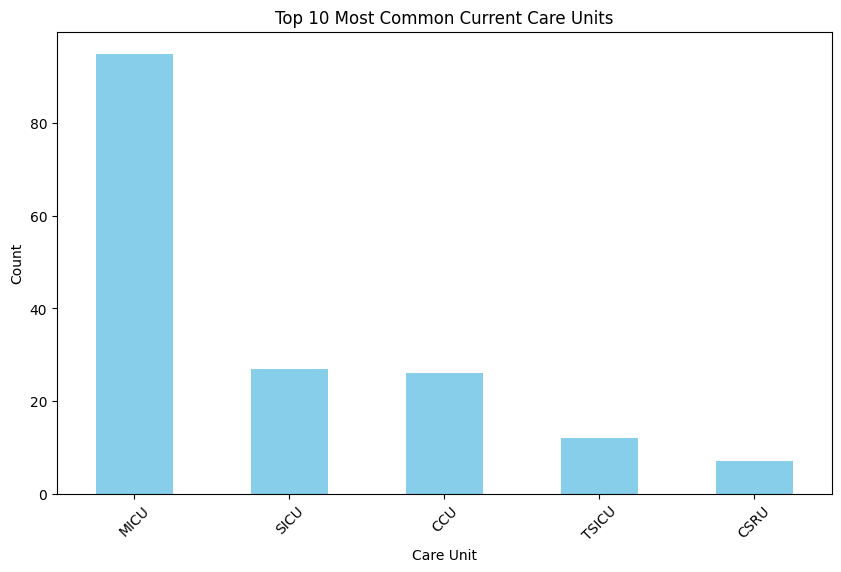

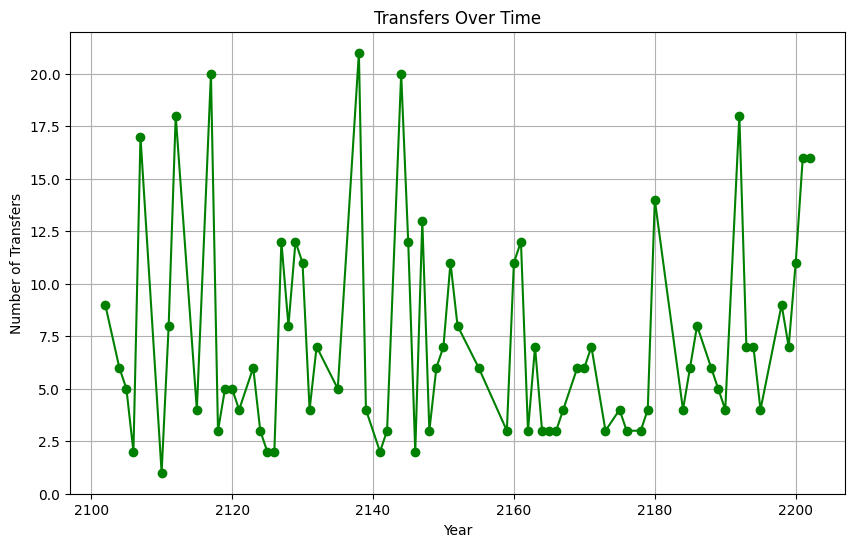

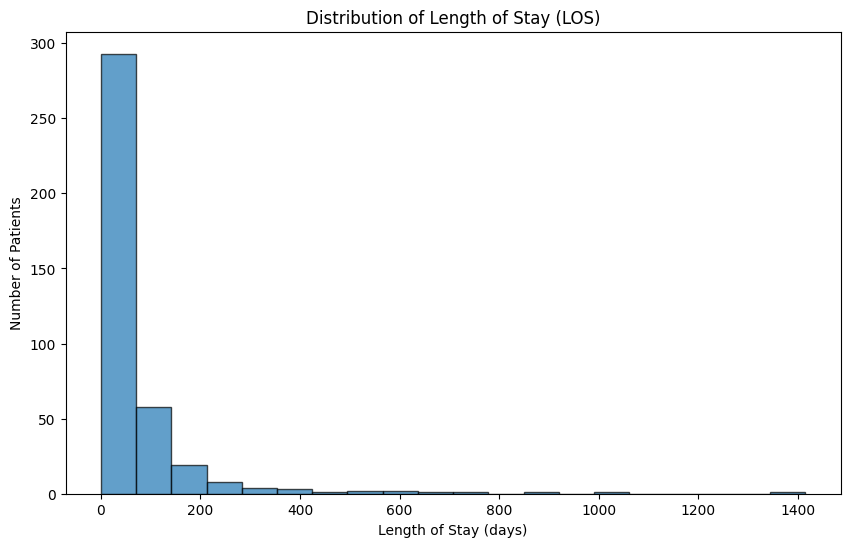

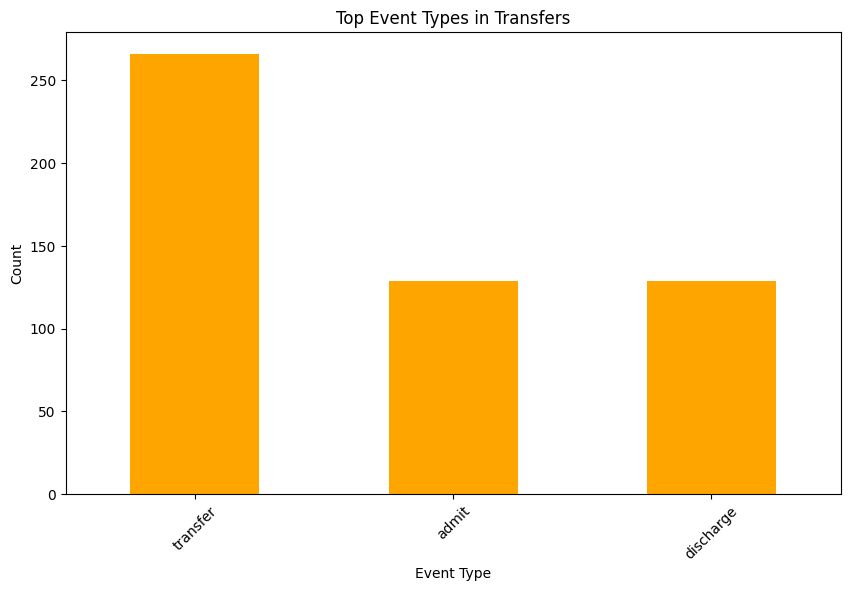

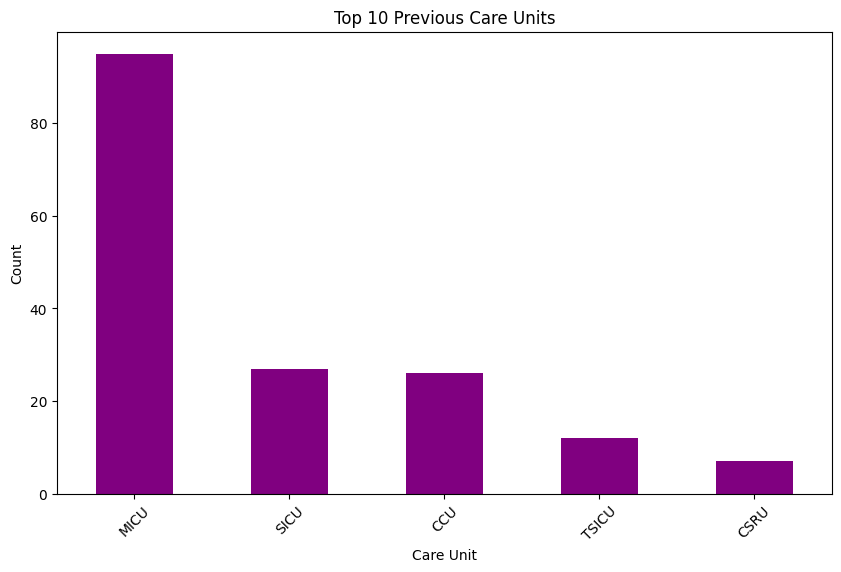


Insights:
1. The most common current care units highlight where patients are frequently transferred.
2. Yearly trends in transfers help identify patterns or changes in hospital operations over time.
3. Length of stay distribution provides insights into patient care duration.
4. Event type analysis reveals the frequency and nature of transfers.
5. Previous care unit statistics offer a view into patient flow within the hospital.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Loading the data for analysis
df=pd.read_csv('/content/drive/My Drive/Exercises/TRANSFERS.csv')

# Display basic information and first few rows
print(f"Initial dataset size: {df.shape[0]} rows, {df.shape[1]} columns")
print(df.info())
print(df.head())

# Display basic dataset information
print("Initial dataset information:")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print(df.info())
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Visualization 1: Most Common Current Care Units
if 'curr_careunit' in df.columns:
    top_care_units = df['curr_careunit'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    top_care_units.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Most Common Current Care Units')
    plt.xlabel('Care Unit')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Visualization 2: Transfers Over Time
if 'intime' in df.columns:
    df['intime'] = pd.to_datetime(df['intime'], errors='coerce')
    df['transfer_year'] = df['intime'].dt.year
    yearly_transfers = df['transfer_year'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_transfers.index, yearly_transfers.values, marker='o', linestyle='-', color='green')
    plt.title('Transfers Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Transfers')
    plt.grid(True)
    plt.show()

# Visualization 3: Distribution of Length of Stay (LOS)
if 'los' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['los'].dropna(), bins=20, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Length of Stay (LOS)')
    plt.xlabel('Length of Stay (days)')
    plt.ylabel('Number of Patients')
    plt.show()

# Visualization 4: Top Event Types
if 'eventtype' in df.columns:
    top_event_types = df['eventtype'].value_counts()
    plt.figure(figsize=(10, 6))
    top_event_types.plot(kind='bar', color='orange')
    plt.title('Top Event Types in Transfers')
    plt.xlabel('Event Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Visualization 5: Top Previous Care Units
if 'prev_careunit' in df.columns:
    top_prev_care_units = df['prev_careunit'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    top_prev_care_units.plot(kind='bar', color='purple')
    plt.title('Top 10 Previous Care Units')
    plt.xlabel('Care Unit')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Insights
print("\nInsights:")
print("1. The most common current care units highlight where patients are frequently transferred.")
print("2. Yearly trends in transfers help identify patterns or changes in hospital operations over time.")
print("3. Length of stay distribution provides insights into patient care duration.")
print("4. Event type analysis reveals the frequency and nature of transfers.")
print("5. Previous care unit statistics offer a view into patient flow within the hospital.")
